# Predykcja oceny końcowej

Celem projektu jest przygotowanie modeli dokonujących predykcji ocen końcowych uczniów na podstawie zbioru danych __Student Performance Data Set__ udostępnionego przez UC Irvine Machine Learning Repository

## Plan projektu
1. Wprowadzenie
2. Przetwarzanie danych 
3. Modelowanie 
4. Analiza wyników i porównanie wyników
5. Wnioski 
6. Podsumowanie

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.callbacks import History
from keras import backend

import warnings
warnings.filterwarnings('ignore')

## 1. Wprowadzenie


In [2]:
data = pd.read_csv('dane/student-por.csv')

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Opis danych:

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

## 2. Przetwarzanie danych
Zanim przejdziemy do tworzenia modeli musimy odpowiednio przygotować nasz zbiór danych. Na początej sprawdźmy czy dane te są kompletne.

In [4]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Musimy przekonwertować binarne dane kategoryczne na liczbowe. 

In [6]:
data['school'] = data['school'].map({'GP':1, 'MS':0})
data['sex'] = data['sex'].map({'M':1,'F':0})
data['famsize'] = data['famsize'].map({'GT3':1, 'LE3':0})#.astype(int)
data['address'] = data['address'].map({'U':1, 'R':0})
data['Pstatus'] = data['Pstatus'].map({'T':1,'A':0})
data['schoolsup'] = data['schoolsup'].map({'yes':1,'no':0})
data['famsup'] = data['famsup'].map({'yes':1,'no':0})
data['paid'] = data['paid'].map({'yes':1,'no':0})
data['activities'] = data['activities'].map({'yes':1,'no':0})
data['nursery'] = data['nursery'].map({'yes':1,'no':0})
data['higher'] = data['higher'].map({'yes':1,'no':0})
data['internet'] = data['internet'].map({'yes':1,'no':0})
data['romantic'] = data['romantic'].map({'yes':1,'no':0})

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    int64 
 1   sex         649 non-null    int64 
 2   age         649 non-null    int64 
 3   address     649 non-null    int64 
 4   famsize     649 non-null    int64 
 5   Pstatus     649 non-null    int64 
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    int64 
 16  famsup      649 non-null    int64 
 17  paid        649 non-null    int64 
 18  activities  649 non-null    int64 
 19  nursery     649 non-null    int64 
 20  higher    

Zobaczmy na pozostałe dane kategoryczne

In [8]:
data['Mjob'].value_counts()

other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64

In [9]:
data['Fjob'].value_counts()

other       367
services    181
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64

In [10]:
data['reason'].value_counts()

course        285
home          149
reputation    143
other          72
Name: reason, dtype: int64

In [11]:
data['guardian'].value_counts()

mother    455
father    153
other      41
Name: guardian, dtype: int64

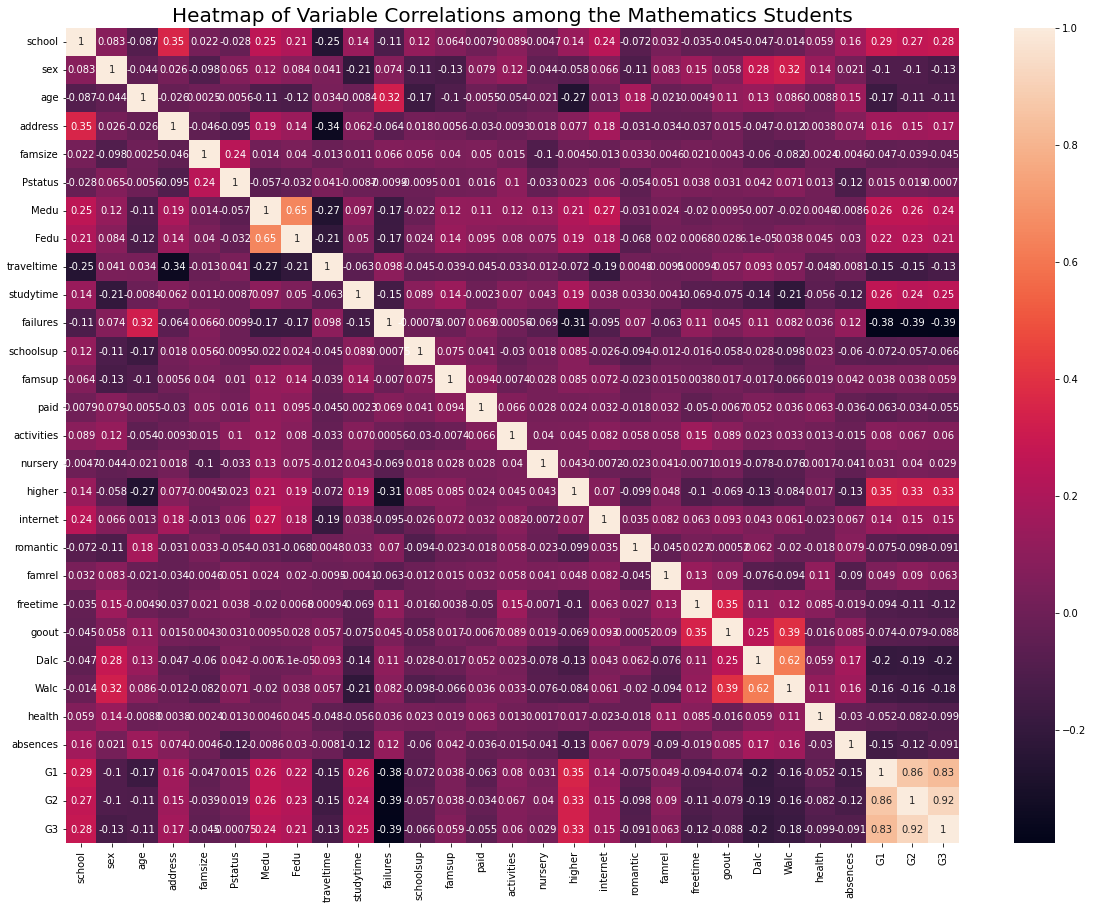

In [12]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)
plt.title('Heatmap of Variable Correlations among the Mathematics Students',fontsize=20)
plt.show()

Ponieważ będziemy chcieli dokonać predykcji tego czy dany student otrzymał zaliczenie, zamienimy kategroyczne kolumny G1, G2, G3 na binarne kolumny mówiące czy w danym etapie uczeń uzyskał zaliczenie. 

In [13]:
#data['G1_Pass'] = data['G1'].apply(lambda x: 1 if x>=11 else 0)
#data['G2_Pass'] = data['G2'].apply(lambda x: 1 if x>=11 else 0)
data['G3_Pass'] = data['G3'].apply(lambda x: 1 if x>=11 else 0)
data.drop(['G1','G2','G3'],axis=1,inplace=True)

In [14]:
data['G3_Pass'].value_counts()

1    452
0    197
Name: G3_Pass, dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    int64 
 1   sex         649 non-null    int64 
 2   age         649 non-null    int64 
 3   address     649 non-null    int64 
 4   famsize     649 non-null    int64 
 5   Pstatus     649 non-null    int64 
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    int64 
 16  famsup      649 non-null    int64 
 17  paid        649 non-null    int64 
 18  activities  649 non-null    int64 
 19  nursery     649 non-null    int64 
 20  higher    

## 3. Modelowanie

#### 3.1 Modele proste

In [16]:
X = data.drop('G3_Pass', axis=1)
y = data['G3_Pass']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

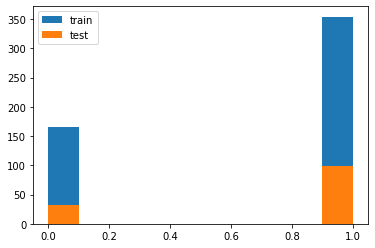

In [17]:
plt.hist(y_train, label="train")
plt.hist(y_test, label="test")
plt.legend()
plt.show()

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(X_train.select_dtypes(exclude=['object']).columns)),
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(X_train.select_dtypes(include=['object']).columns)),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False, handle_unknown = 'ignore')),
    ])

from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline)
    ])

In [20]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

In [21]:
pipe_1 = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', LogisticRegression())
])

param_grid_1 = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(pipe_1, param_grid_1, cv=kfold)
grid_1.fit(X_train, y_train)
grid_1.best_params_

{'classifier__C': 1}

In [23]:
pipe_2 = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', SVC(probability=True))
])

param_grid_2 = {
    'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_2 = GridSearchCV(pipe_2, param_grid_2, cv=kfold)
grid_2.fit(X_train, y_train)
grid_2.best_params_

{'classifier__C': 100, 'classifier__gamma': 0.001}

In [24]:
pipe_3 = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', SVC(kernel="poly", probability=True))
]) 

param_grid_3 = {
    'classifier__C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__coef0': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__degree': [1, 2, 3, 4, 5, 6]
}

grid_3 = GridSearchCV(pipe_3, param_grid_3, cv=kfold, return_train_score=True)
grid_3.fit(X_train, y_train)
grid_3.best_params_

{'classifier__C': 0.001, 'classifier__coef0': 10, 'classifier__degree': 4}

In [25]:
pipeline_4 = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', DecisionTreeClassifier())
])

param_grid_4 = {
    'classifier__max_depth': [1, 5, 10, 20],
    'classifier__max_leaf_nodes': [None, 5, 10, 20, 50, 100],
}

grid_4 = GridSearchCV(pipeline_4, param_grid_4, cv=kfold, return_train_score=True)
grid_4.fit(X_train, y_train)
grid_4.best_params_

{'classifier__max_depth': 1, 'classifier__max_leaf_nodes': None}

In [26]:
pipeline_5 = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', RandomForestClassifier())
])

param_grid_5 = {
    'classifier__n_estimators' : [1, 3, 5, 10, 50],
    'classifier__max_leaf_nodes' : [2, 4, 8, 16, 32, 64],
}

grid_5 = GridSearchCV(pipeline_5, param_grid_5, cv=kfold, return_train_score=True)
grid_5.fit(X_train, y_train)
grid_5.best_params_

{'classifier__max_leaf_nodes': 32, 'classifier__n_estimators': 50}

In [27]:
pipeline_6 = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', AdaBoostClassifier())
])

param_grid_6 = {
    'classifier__n_estimators' : [5, 10, 50, 100, 500, 600, 700],
    'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 0.7, 1],
}

grid_6 = GridSearchCV(pipeline_6, param_grid_6, cv=kfold, return_train_score=True)
grid_6.fit(X_train, y_train)
grid_6.best_params_

{'classifier__learning_rate': 0.5, 'classifier__n_estimators': 10}

In [28]:
pipeline_7 = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', GradientBoostingClassifier())
])

param_grid_7 = {
    'classifier__n_estimators' : [5, 10, 50, 100, 500, 600, 700],
    'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 0.7, 1],
}

grid_7 = GridSearchCV(pipeline_7, param_grid_7, cv=kfold, return_train_score=True)
grid_7.fit(X_train, y_train)
grid_7.best_params_

{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 10}

In [29]:
pipeline_8 = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', XGBClassifier())
])

param_grid_8 = {
    'classifier__learning__rate':[0.01, 0.1, 1, 2, 5],
    'classifier__reg_lambda':[0.01, 0.1, 0.5, 1, 2, 5],
    'classifier__n_estimators':[1,2,5, 7, 10, 15]
}

grid_8 = GridSearchCV(pipeline_8, param_grid_8, cv=kfold, return_train_score=True)
grid_8.fit(X_train, y_train)
grid_8.best_params_

[20:39:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learning__rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:39:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learning__rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:39:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learning__rate" } might not be used.


{'classifier__learning__rate': 0.01,
 'classifier__n_estimators': 5,
 'classifier__reg_lambda': 5}

#### 3.2 Modele głębokie

In [30]:
pipeline_9 = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', MLPClassifier())
])

param_grid_9 = {
    'classifier__hidden_layer_sizes': [(20,10)],
    'classifier__learning_rate_init': [0.001, 0.01, 0.1],
    'classifier__max_iter': [100, 500, 1000],
    'classifier__batch_size': [8, 16,32],
}

grid_9 = GridSearchCV(pipeline_9, param_grid_9, cv=kfold, return_train_score=True)
grid_9.fit(X_train, y_train)
grid_9.best_params_

{'classifier__batch_size': 32,
 'classifier__hidden_layer_sizes': (20, 10),
 'classifier__learning_rate_init': 0.001,
 'classifier__max_iter': 500}

In [31]:
from sklearn import metrics

models = []
models.append(('Logistic Reg', grid_1.best_estimator_))
models.append(('SVM rbf', grid_2.best_estimator_))
models.append(('SVM Poly', grid_3.best_estimator_ ))
models.append(('Decision Tree', grid_4.best_estimator_))
models.append(('Random Forest', grid_5.best_estimator_))
models.append(('Ada Boost', grid_6.best_estimator_))
models.append(('Gradient Boost', grid_7.best_estimator_))
models.append(('XGBoost', grid_8.best_estimator_))
models.append(('MLP Classifier', grid_9.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))


In [32]:
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc_score' : roc_auc_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['Logistic Reg', 'SVM rbf', 'SVM poly', 'Decision Tree', 'Random Forest',
                                        'Ada Boost', 'Gradient Boost', 'XGBoost', 'MLP Classifier'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
0,Logistic Reg,0.841584,0.867347,0.854271,0.776923,0.804209
1,SVM rbf,0.858491,0.928571,0.892157,0.830769,0.817921
2,SVM poly,0.846154,0.897959,0.871287,0.800000,0.805963
3,Decision Tree,0.821429,0.938776,0.876190,0.800000,0.656888
4,Random Forest,0.821429,0.938776,0.876190,0.800000,0.790179
5,Ada Boost,0.842593,0.928571,0.883495,0.815385,0.774554
6,Gradient Boost,0.828829,0.938776,0.880383,0.807692,0.760842
7,XGBoost,0.850467,0.928571,0.887805,0.823077,0.755580
8,MLP Classifier,0.844444,0.775510,0.808511,0.723077,0.745855


In [25]:
backend.clear_session()

history = History()

model = Sequential()
model.add(Flatten())
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))

model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [41]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=200)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
test_eval = model.evaluate(X_test,y_test)
test_eval

In [ ]:
print(metrics.accuracy_score(y_true= y_test, y_pred= model.predict_classes(X_test)))